# Statistical Modeling 

Statistical modeling is a mathematical approach used to represent and analyze the relationships between variables in data. It involves constructing a model that captures the underlying patterns and structures within a dataset, often with the goal of making predictions or understanding the data better.


    Independent variables are also known as: predictor variables, input variables, explanatory variables, features
    
    Dependent variables are also known as: outcome variables, target variables, response variables


## Model Loss

A loss function evaluates how well your model represents the relationship between data variables.



## Simple Linear Regression

The model notation is 

$$y=mx+c$$

or, alternatively

$$y = \beta_0+ \beta_1 x $$

## Calculating M

### The Least-Squares Method

We can calculate $\hat{m}$ (the slope of the best-fit line) using this formula:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

Breaking down those components, we have:

* $\hat{m}$: the estimated slope
* $\rho$: the Pearson correlation, represented by the Greek letter "Rho"
* $S_y$: the standard deviation of the y values
* $S_x$: the standard deviation of the x values

## Calculating C

Then once we have the slope value ($\hat{m}$), we can put it back into our formula $(\hat{y} = \hat{m} x + \hat{c})$ to calculate the intercept. The idea is that

$$\bar{y} = \hat{c} + \hat{m} \bar{x}$$

so

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Breaking down those components, we have:

* $\hat{c}$: the estimated intercept
* $\bar{y}$: the mean of the y values
* $\hat{m}$: the estimated slope
* $\bar{x}$: the mean of the x values

In [69]:
# imports 

import numpy as np 
import seaborn as sns

In [70]:

# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

Write a function `calc_slope` that returns $\hat{m}$ for a given set of x and y data.

The formula is:

$$\hat{m} = \rho \frac{S_y}{S_x}$$

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

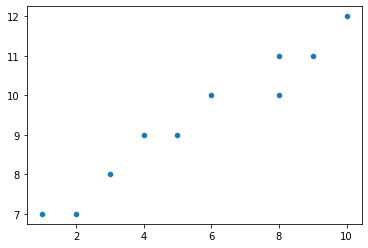

In [71]:
sns.scatterplot(X,Y)

In [72]:
# calculate the slope 
std_y = Y.std()#np.std(Y)
std_x= X.std()#np.std(X)
p_corr = np.corrcoef(X,Y)[0][1]
m = p_corr * (std_y/std_x)
m

0.5393518518518519

In [73]:
#heat map
# sns.heatmap(p_corr,annot=True) #where p_corr = np.corrcoef(X,Y) doesnt have[0][1]

In [74]:
def get_slope(X,Y):
    # corr_coef
    p_corr = np.corrcoef(X,Y)[0][1]
    #std y
    std_y = np.std(Y)
    #std X
    std_x = X.std()
    #m
    m = p_corr*(std_y/std_x)
    return m

get_slope(X,Y)

0.5393518518518519

## Calculating the Intercept

Now that we have our estimated slope $\hat{m}$, we can calculate the estimated intercept $\hat{c}$.

As a reminder, the calculation for the best-fit line's y-intercept is:

$$\hat{c} = \bar{y} - \hat{m} \bar{x}$$

Write a function `calc_intercept` that returns $\hat{c}$ for a given $\hat{m}$, x, and y.


In [75]:
# calculate the intecept
Y_mean = Y.mean()#np.mean()
X_mean = X.mean()
print('Y_mean',Y_mean)
print('X_mean',X_mean)
c = Y_mean - m*(X_mean)
c


Y_mean 9.4
X_mean 5.6


6.37962962962963

In [76]:
def get_c(X,Y):
    #Y_mean
    Y_mean = np.mean(Y)
    #X_mean
    X_mean = np.mean(X)
    m = m= get_slope(X,Y)
    #c
    c = Y_mean - m*(X_mean)
    return c

get_c(X,Y)

6.37962962962963

## Predicting a datapoint 

In [77]:
# to predict a data point 
# X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# # Y = Dependent Variable
# Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)
y = 3* get_slope(X,Y) + get_c(X,Y)
y

7.997685185185185

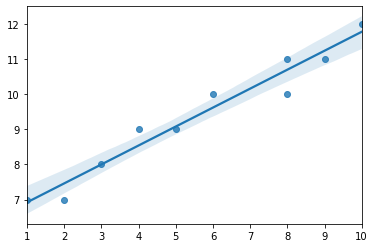

In [78]:
sns.regplot(x=X,y=Y);

# Todo

In [79]:
# make a model for sales and any other column in the provided dataset
import pandas as pd
df = pd.read_csv('./data/advertising.csv',index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [88]:
#predict sales using TV
#Tv list
tv = df['TV']
#sales list
sales = df['sales']
print('slope',get_slope(tv,sales))
print('intercept',get_c(tv,sales))
y = 230.1* get_slope(tv,sales) + get_c(tv,sales)
y

slope 0.04741764990739118
intercept 7.050090213492435


17.960891457183145

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


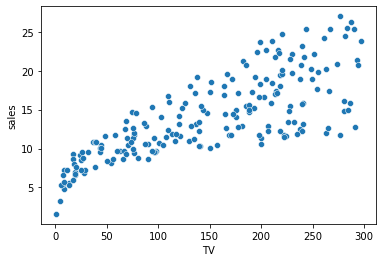

In [90]:

np.corrcoef(tv,sales)[0][1]
sns.scatterplot(tv,sales);

In [81]:
#predict sales using Radio
#Tv list
radio = df['radio']
print('slope',get_slope(radio,sales))
print('intercept',get_c(radio,sales))
y = 37.8* get_slope(radio,sales) + get_c(radio,sales)
y


slope 0.20198890954767607
intercept 9.323430008282863


16.958610789185016

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.5762225745710553

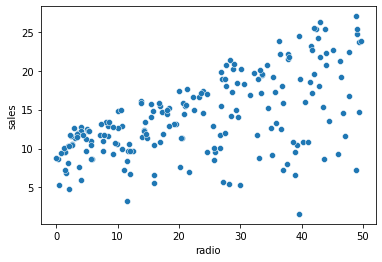

In [93]:
sns.scatterplot(radio,sales);
np.corrcoef(radio,sales)[0][1]

<AxesSubplot:>

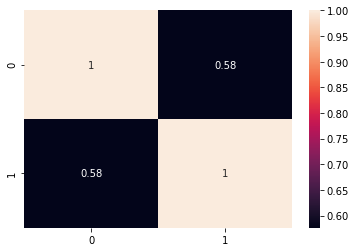

In [96]:
sns.heatmap(np.corrcoef(radio,sales),annot=True)

In [82]:
#predict sales using newspaper
#Tv list
newspaper = df['newspaper']
print('slope',get_slope(newspaper,sales))
print('intercept',get_c(newspaper,sales))
y = 69.2* get_slope(newspaper,sales) + get_c(newspaper,sales)
y

slope 0.054556194381530115
intercept 12.355590036866731


16.130878688068616

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


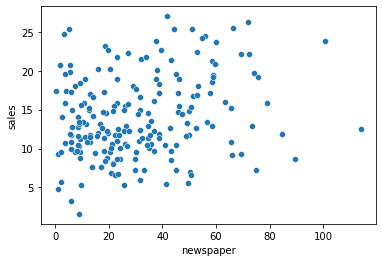

In [92]:
sns.scatterplot(newspaper,sales);

### Linear Regression With StatsModel
An example of linear Regression model ands it evalution using stats model

In [ ]:
import statsmodels.api as sm
## get X and Y
X=df['TV']
Y = df['sales']
# build model 
model = sm.OLS(endog=Y,exog=sm.add_constant(X))
model

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [ ]:
# train the model
results = model.fit() #making the line of best fit
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.47e-42
Time:                        20:11:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluating and Interpreting the Model
### F-Test
### Measuring Statistical Significance
So, is our overall model statistically significant? Let's frame this in terms of a null and alternative hypothesis:

`H 0 (null hypothesis): the intercept-only model fits the data just as well as (or better than) our model`
`H a (alternative hypothesis): our model fits the data better than the intercept-only model`

In [ ]:
# F1- score
results.f_pvalue,results.fvalue #check statisctical significance
#*For fp-values below the significant value e.g 0.05 we reject the null hypothesis*

(1.467389700194647e-42, 312.144994372713)

### R-Squared
### Measuring Goodness of Fit
We can quantify how much of the variation in the dependent variable is explained by our model. This measure is called the R 2 or coefficient of determination.

In [ ]:
#r2 score
results.rsquared
#*out put is a percentage between 0 and 1 higher values are better* #50 shows guesswork #how model fits the data
#how well does our straight line/model of best fit represent our data
#here our model represent 61% of the changes in our data(variance)
#higher shows our data is close to the line of best fit(data is closelypacked and therefore not much var)

0.611875050850071

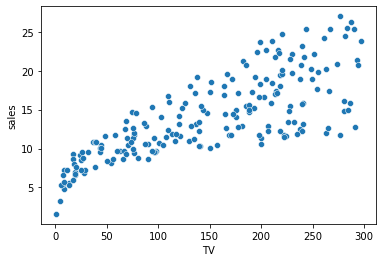

In [ ]:
sns.scatterplot(x=X,y=Y);#model cld not be very accurate since as we get to higher values eg 300 there is one with 10 sales and other with high#same from 150-300

Other evaluation Metrics
Model parameters:


In [ ]:
# y=mx+c
# m,c
results.params #tv=m #mis negative for a negative correlation

const    7.032594
TV       0.047537
dtype: float64

Model parameter p-values:

In [116]:
# p-values  for m & c
results.pvalues

const    1.406300e-35
TV       1.467390e-42
dtype: float64

Model Confidence intervals
returns value ranges at 95% percent confidence intervals

# confidence intervals

In [121]:
results.conf_int() #give ranges instead of single values

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [126]:
#y = mx+c
lower_bound = 0.04223*230.1 + 6.129719
print('lower_bound',lower_bound)
higher_bound = 0.052843*230.1 + 7.935468
print('higher_bound',higher_bound)

lower_bound 15.846841999999999
higher_bound 20.0946423


In [119]:
lower_bound,higher_bound

(14.575719, 18.504068)

In [127]:
lower_bound = 0.04223*44.5 + 6.129719
print('lower_bound',lower_bound)
higher_bound = 0.052843*44.5 + 7.935468
print('higher_bound',higher_bound)

lower_bound 8.008954
higher_bound 10.2869815


In [128]:
lower_bound = 0.04223*17.2 + 6.129719
print('lower_bound',lower_bound)
higher_bound = 0.052843*17.2 + 7.935468
print('higher_bound',higher_bound)

lower_bound 6.856075
higher_bound 8.8443676


In [122]:
results.conf_int(0.999999999999)

,0,1
const,7.032594,7.032594
TV,0.047537,0.047537


In [123]:
lower_bound = 0.047537*230.1 + 7.032594
print('lower_bound',lower_bound)
higher_bound =0.047537*230.1 + 7.032594
print('higher_bound',higher_bound)

lower_bound 17.9708577
higher_bound 17.9708577
